# Notebook 2: Exploratory Data Analysis and Data Cleaning
Please see the `README.md` file to learn about this project.

In Notebook 1 the data were scraped from two sources and compiled into one dataframe (`df.csv`). In Notebook 2 the data are going to be explored and cleaned.

## 2.1 Energy Demand Exploratory Data Analysis

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_csv('csv_files\df.csv', index_col=0)

In [4]:
df.head(10)

,Date,Daily Energy Demand,Max Temp,Station ID,Station Location,Min Temp
0,2018-04-10,7183786.0,79.0,GHCND:USW00023174,Los Angeles International Airport,60.0
1,2018-04-10,7183786.0,85.0,GHCND:USW00023188,San Diego Airport,60.0
2,2018-04-10,7183786.0,63.0,GHCND:USW00023272,San Francisco Downtown,52.0
3,2018-04-10,7183786.0,86.0,GHCND:USW00093193,FRESNO YOSEMITE INTERNATIONAL,59.0
4,2018-04-10,7183786.0,68.0,GHCND:USW00093225,SACRAMENTO METROPOLITAN AIRPORT,51.0
5,2018-04-10,7183786.0,69.0,GHCND:USW00023293,San Jose,52.0
6,2018-04-10,7183786.0,72.0,GHCND:USW00003102,Ontario Airport,51.0
7,2018-04-11,1961585.0,74.0,GHCND:USW00023174,Los Angeles International Airport,57.0
8,2018-04-11,1961585.0,73.0,GHCND:USW00023188,San Diego Airport,60.0
9,2018-04-11,1961585.0,60.0,GHCND:USW00023272,San Francisco Downtown,49.0


In [5]:
import seaborn as sns

Text(0.5, 1.0, "Fig. 2.1: California's Daily Energy Demand (2018-2022)")

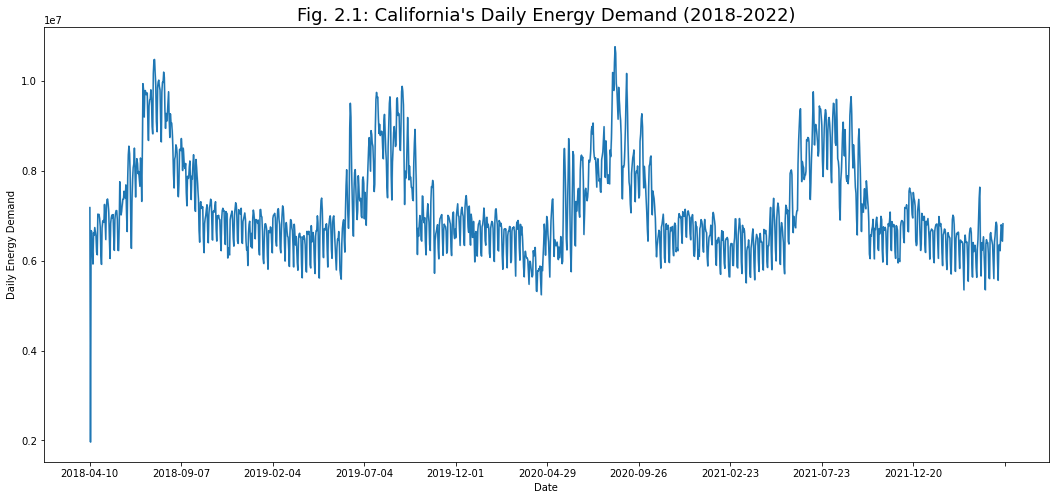

In [6]:
plt.figure(figsize=(18,8))
plt.xticks(np.arange(0, len(df), 150))
sns.lineplot( x ='Date', y= 'Daily Energy Demand', data = df) 
plt.title("Fig. 2.1: California's Daily Energy Demand (2018-2022)", fontsize=18)

Some general trends can be seen each year, there is an annual spike that begins around July, and energy demand in January is low, comparatively. 
This initial plot affirms that the seasons will be an important factor in determining energy demand. This project will consider the effect of seasonality using weather data.

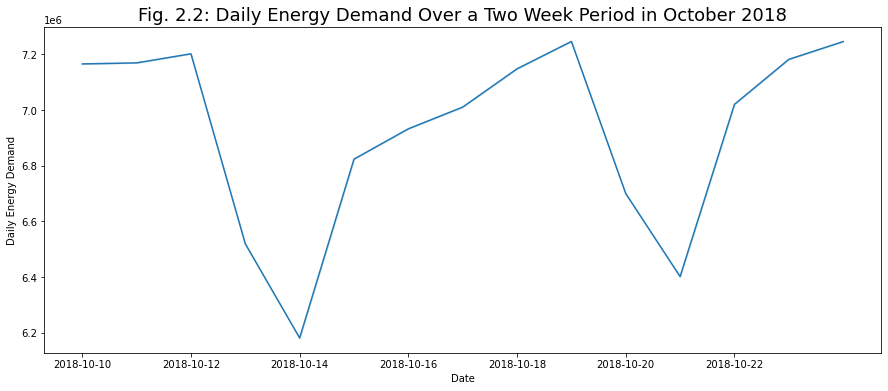

In [7]:
plt.figure(figsize=(15,6))
sns.lineplot( x ='Date', y= 'Daily Energy Demand', data = df.iloc[1280:1379]) #7*14 = 98 rows for a two week period
plt.xticks(np.arange(0, 14, 2))
plt.title("Fig. 2.2: Daily Energy Demand Over a Two Week Period in October 2018", fontsize=18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Looking at a random two week period, there are two dips, suggests the day of the week is potentially important. Let's create a feature for day of the week.

#### Feature Engineering- Day

In [8]:
df['Date']=pd.to_datetime((df['Date'])) #convert object type to DateTime 

In [9]:
df['Date']

0       2018-04-10
1       2018-04-10
2       2018-04-10
3       2018-04-10
4       2018-04-10
           ...    
10467   2022-05-15
10468   2022-05-16
10469   2022-05-16
10470   2022-05-16
10471   2022-05-16
Name: Date, Length: 10472, dtype: datetime64[ns]

In [10]:
df['Day']= df['Date'].dt.day_name() #DateTime attribute

In [11]:
df.head(15)

,Date,Daily Energy Demand,Max Temp,Station ID,Station Location,Min Temp,Day
0,2018-04-10,7183786.0,79.0,GHCND:USW00023174,Los Angeles International Airport,60.0,Tuesday
1,2018-04-10,7183786.0,85.0,GHCND:USW00023188,San Diego Airport,60.0,Tuesday
2,2018-04-10,7183786.0,63.0,GHCND:USW00023272,San Francisco Downtown,52.0,Tuesday
3,2018-04-10,7183786.0,86.0,GHCND:USW00093193,FRESNO YOSEMITE INTERNATIONAL,59.0,Tuesday
4,2018-04-10,7183786.0,68.0,GHCND:USW00093225,SACRAMENTO METROPOLITAN AIRPORT,51.0,Tuesday
5,2018-04-10,7183786.0,69.0,GHCND:USW00023293,San Jose,52.0,Tuesday
6,2018-04-10,7183786.0,72.0,GHCND:USW00003102,Ontario Airport,51.0,Tuesday
7,2018-04-11,1961585.0,74.0,GHCND:USW00023174,Los Angeles International Airport,57.0,Wednesday
8,2018-04-11,1961585.0,73.0,GHCND:USW00023188,San Diego Airport,60.0,Wednesday
9,2018-04-11,1961585.0,60.0,GHCND:USW00023272,San Francisco Downtown,49.0,Wednesday


In [12]:
#specify the order of the week to set the x-axis order for plotting
dayorder= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

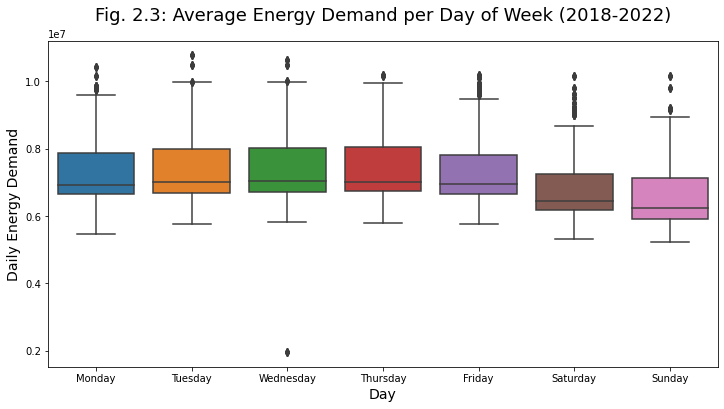

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x= 'Day', y='Daily Energy Demand', order=dayorder)
plt.title("Fig. 2.3: Average Energy Demand per Day of Week (2018-2022)", fontsize=18, pad=20)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

 Looks like the day of the week will be an important feature when forecasting energy demand. Energy demand is fairly consistent Tuesdays-Thursdays, with a slight decrease on Fridays and Mondays, and then a more substantial decrease on Saturdays and Sundays. Perhaps holiday weekends play a role in affecting Monday and Friday demand.

In [14]:
df.groupby('Day')['Daily Energy Demand'].describe()

,count,mean,std,min,25%,50%,75%,max
Day,,,,,,,,
Friday,1496.0,7.324006e+06,1.005175e+06,5761548.0,6655160.0,6954462.5,7825330.0,10191567.0
Monday,1493.0,7.277122e+06,9.779865e+05,5474429.0,6638385.0,6917822.0,7881279.0,10409795.0
Saturday,1497.0,6.826309e+06,9.854862e+05,5324575.0,6164517.0,6450674.0,7259572.0,10157171.0
Sunday,1496.0,6.580411e+06,9.620885e+05,5242117.0,5898583.0,6229611.0,7130954.0,10171423.0
Thursday,1498.0,7.397112e+06,9.748787e+05,5803203.0,6731143.0,7011809.5,8051625.0,10200932.0
Tuesday,1496.0,7.387398e+06,9.867186e+05,5764182.0,6671303.0,7023464.0,7993980.0,10766451.0
Wednesday,1496.0,7.388496e+06,1.053059e+06,1961585.0,6711839.0,7024951.0,8029561.0,10617482.0


The statistics above are used to calculate the values in the boxplot. Note that the std is high for Fridays, further suggesting holiday weekends may cause fluctuation in demand.

## 2.2 Energy Data Cleaning

We know that when scraping the energy data a few dates had incomplete data sets, this is clearly visible by the dip in Figure 2.1, and likely responsible for the outlying data point on a Wednesday in Figure 2.3. For the weather data, a few dates had missing temperature readings, so those will have to be dealt with.

Let's try using zscore to examine outlying energy values. This strategy will help to identify any days where there were less values being summed than expected.

In [15]:
from scipy.stats import zscore
from scipy import stats

In [16]:
z_scores = stats.zscore(df['Daily Energy Demand'])
abs_z_scores = np.abs(z_scores)
abs_z_scores.count()

10472

In [17]:
outliers = abs_z_scores[abs_z_scores > 3]
outliers.count()

42

Within the 10472 energy values, 42 of them were determined to have an absolute z score of > 3. It is important to mention that there are not 10472 days in the energy data set, there are 1498 days, but most of those days have 7 station's temperature readings for them so they occur 7x in the data set. So really, 6 days are outliers.

In [18]:
outliers_index = outliers.index.values

In [19]:
outliers_index

array([   7,    8,    9,   10,   11,   12,   13,  735,  736,  737,  738,
        739,  740,  741,  742,  743,  744,  745,  746,  747,  748, 6011,
       6012, 6013, 6014, 6015, 6016, 6017, 6018, 6019, 6020, 6021, 6022,
       6023, 6024, 6025, 6026, 6027, 6028, 6029, 6030, 6031], dtype=int64)

The outliers have the index values written above.

It looks like April 11 is indeed incomplete

In [28]:
df.iloc[[ 7,    8,    9,   10,   11,   12,   13,  735,  736,  737,  738,
        739,  740,  741,  742,  743,  744,  745,  746,  747,  748, 6011,
       6012, 6013, 6014, 6015, 6016, 6017, 6018, 6019, 6020, 6021, 6022,
       6023, 6024, 6025, 6026, 6027, 6028, 6029, 6030, 6031]]

,Date,Daily Energy Demand,Max Temp,Station ID,Station Location,Min Temp,Day
7,2018-04-11,1961585.0,74.0,GHCND:USW00023174,Los Angeles International Airport,57.0,Wednesday
8,2018-04-11,1961585.0,73.0,GHCND:USW00023188,San Diego Airport,60.0,Wednesday
9,2018-04-11,1961585.0,60.0,GHCND:USW00023272,San Francisco Downtown,49.0,Wednesday
10,2018-04-11,1961585.0,75.0,GHCND:USW00093193,FRESNO YOSEMITE INTERNATIONAL,51.0,Wednesday
11,2018-04-11,1961585.0,62.0,GHCND:USW00093225,SACRAMENTO METROPOLITAN AIRPORT,44.0,Wednesday
12,2018-04-11,1961585.0,68.0,GHCND:USW00023293,San Jose,46.0,Wednesday
13,2018-04-11,1961585.0,82.0,GHCND:USW00003102,Ontario Airport,46.0,Wednesday
735,2018-07-24,10471762.0,85.0,GHCND:USW00023174,Los Angeles International Airport,69.0,Tuesday
736,2018-07-24,10471762.0,85.0,GHCND:USW00023188,San Diego Airport,71.0,Tuesday
737,2018-07-24,10471762.0,65.0,GHCND:USW00023272,San Francisco Downtown,56.0,Tuesday


The above dates are the 6 days where the energy demand has a z score >3. Manual inspection of these dates on the Caiso website shows only 4/11 has incomplete data. It is likely that an atypical event caused higher than usual energy demand for Jul 24-25, 2018 and Aug 17-19, 2020. These events may have been heat waves, since the max temps were above 100 in some locations on those days.

To account for the missing data on April 11, 2018, an average energy from the day before and day after will be used to replace the current value.

In [29]:
#average of April 10 and April 12 energy in 2018
(df.loc[df['Date']== '2018-04-10']['Daily Energy Demand'].values[0] + df.loc[df['Date']== '2018-04-12']['Daily Energy Demand'].values[0])/2

6927243.5

In [30]:
#function for filling in the April 11 data
def missingdata_fill(row):
    if str(row['Date']) == '2018-04-11 00:00:00':
        energy= 6927243.5
        return energy
    else:
        return row['Daily Energy Demand']

In [31]:
df['Daily Energy Demand']= df.apply(missingdata_fill, axis=1)

In [32]:
df.head(20)

,Date,Daily Energy Demand,Max Temp,Station ID,Station Location,Min Temp,Day
0,2018-04-10,7183786.0,79.0,GHCND:USW00023174,Los Angeles International Airport,60.0,Tuesday
1,2018-04-10,7183786.0,85.0,GHCND:USW00023188,San Diego Airport,60.0,Tuesday
2,2018-04-10,7183786.0,63.0,GHCND:USW00023272,San Francisco Downtown,52.0,Tuesday
3,2018-04-10,7183786.0,86.0,GHCND:USW00093193,FRESNO YOSEMITE INTERNATIONAL,59.0,Tuesday
4,2018-04-10,7183786.0,68.0,GHCND:USW00093225,SACRAMENTO METROPOLITAN AIRPORT,51.0,Tuesday
5,2018-04-10,7183786.0,69.0,GHCND:USW00023293,San Jose,52.0,Tuesday
6,2018-04-10,7183786.0,72.0,GHCND:USW00003102,Ontario Airport,51.0,Tuesday
7,2018-04-11,6927243.5,74.0,GHCND:USW00023174,Los Angeles International Airport,57.0,Wednesday
8,2018-04-11,6927243.5,73.0,GHCND:USW00023188,San Diego Airport,60.0,Wednesday
9,2018-04-11,6927243.5,60.0,GHCND:USW00023272,San Francisco Downtown,49.0,Wednesday


Now all of the 4-11-2018 values have been filled in with more realistic energy values.

Figure 2.1 can be replotted now with a better use of whitespace.

Text(0.5, 1.0, "Fig. 2.1.v2: California's Daily Energy Demand (2018-2022)")

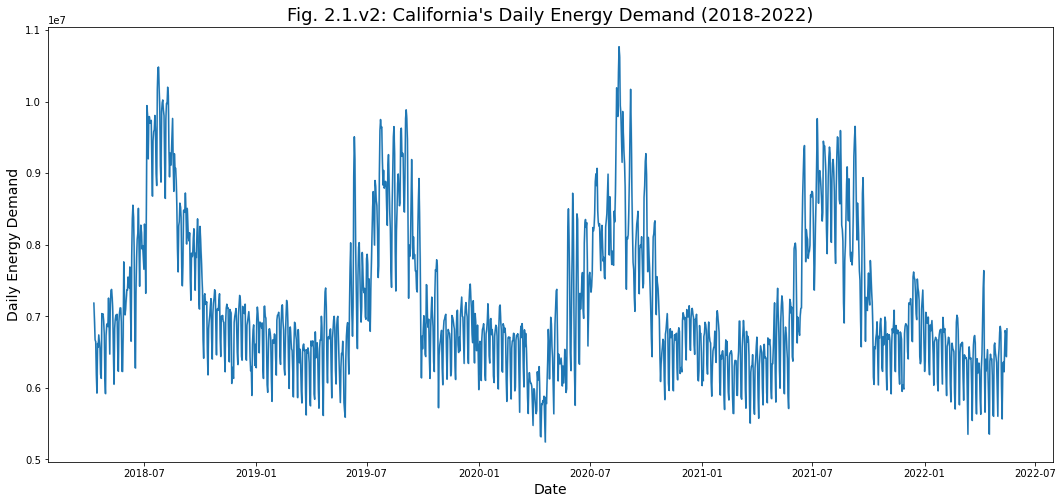

In [33]:
plt.figure(figsize=(18,8))
sns.lineplot(x ='Date', y= 'Daily Energy Demand', data = df) 
plt.title("Fig. 2.1.v2: California's Daily Energy Demand (2018-2022)", fontsize=18)


#### Feature Engineering- Month

Creating a feature for month using the month_name function

In [34]:
df['Month'] = df['Date'].dt.month_name()

Specifying the month order for plotting

In [35]:
monthorder= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

<AxesSubplot:title={'center':"Fig. 2.4: California's Monthly Average Energy Demand 2018-2022"}, xlabel='Month', ylabel='Daily Energy Demand'>

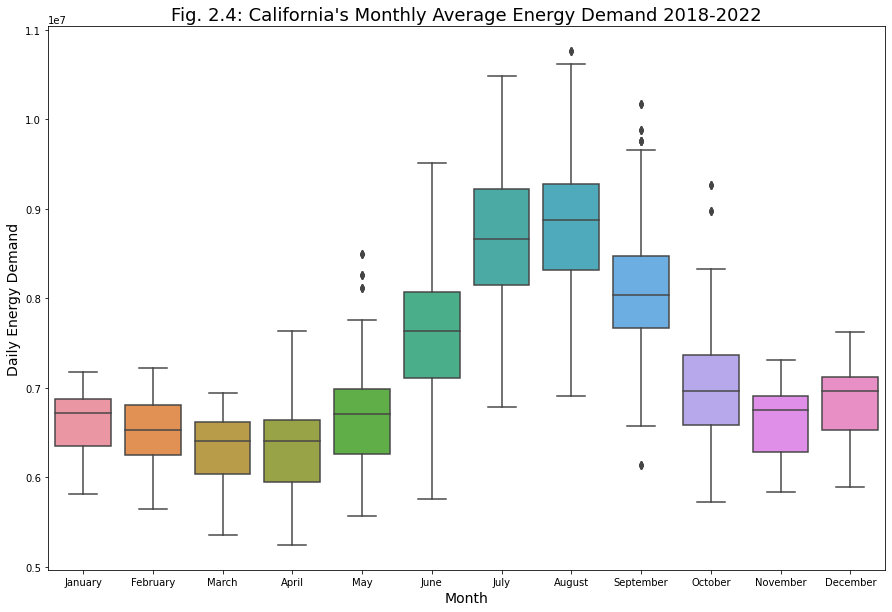

In [36]:
plt.figure(figsize=(15,10))
plt.title("Fig. 2.4: California's Monthly Average Energy Demand 2018-2022", fontsize=18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.boxplot(data = df, x= 'Month', y='Daily Energy Demand', order= monthorder)

Unsurprisingly, summer has the most energy demand, likely due to the use of air conditioning. Some outlying data points in May, September and October may be caused by unusually hot days. The increase in December is interesting and while it could be due to weather, could also have additional influences like school being out and Christmas lights.

In [37]:
df.groupby('Month')['Daily Energy Demand'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
April,986.0,6.348322e+06,470803.491624,5242117.0,5941988.00,6409634.0,6643068.00,7638350.0
August,862.0,8.843393e+06,765236.157840,6905232.0,8319108.00,8873114.0,9283218.00,10766451.0
December,867.0,6.868896e+06,357114.908015,5893254.0,6533175.50,6962293.0,7122762.50,7618952.0
February,791.0,6.502349e+06,393163.746612,5642251.0,6254515.00,6532427.0,6809994.00,7221650.0
January,868.0,6.619063e+06,337553.027087,5810743.0,6353226.25,6720612.0,6875809.25,7174229.0
July,868.0,8.663328e+06,806243.934794,6790239.0,8152963.25,8659204.0,9224283.75,10482535.0
June,840.0,7.631256e+06,729738.686928,5756188.0,7106883.25,7637678.5,8073755.25,9508169.0
March,868.0,6.334860e+06,382226.988398,5350644.0,6040644.75,6409806.5,6620303.75,6940731.0
May,976.0,6.646605e+06,523458.189719,5564685.0,6255486.00,6703187.0,6985824.00,8501267.0


Quantitative values underlying Figure 2.4

#### Feature Engineering- Year

We know that the first and final years in the data set are incomplete, so having the ability to seperate by year may be important. Additionally, it will be interesting to see how demand has changed over the years.

In [38]:
df['Year']= df['Date'].dt.year

In [39]:
df.head(2)

,Date,Daily Energy Demand,Max Temp,Station ID,Station Location,Min Temp,Day,Month,Year
0,2018-04-10,7183786.0,79.0,GHCND:USW00023174,Los Angeles International Airport,60.0,Tuesday,April,2018
1,2018-04-10,7183786.0,85.0,GHCND:USW00023188,San Diego Airport,60.0,Tuesday,April,2018


Since both 2018 and 2022 are incomplete, let's first look at a boxplot of the complete years 

<AxesSubplot:title={'center':"Fig. 2.5: California's Yearly Energy Demand"}, xlabel='Year', ylabel='Daily Energy Demand'>

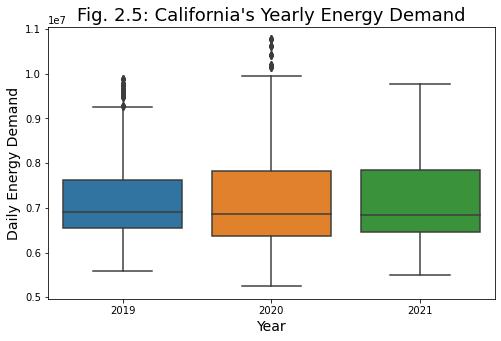

In [40]:
plt.figure(figsize=(8,5))
plt.title("Fig. 2.5: California's Yearly Energy Demand", fontsize = 18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
full_years = df[(df['Year']== 2019) | (df['Year']== 2020)| (df['Year']== 2021)]          
sns.boxplot(data = full_years, x= 'Year', y='Daily Energy Demand')

Both 2020 and 2021 had higher energy demand than 2019. It is notable that despite disruptions caused by COVID-19 in 2020, the energy demand for 2021 is about equal to the demand in 2020.

<AxesSubplot:title={'center':'Note:2018 is missing data from Jan-March'}, xlabel='Month', ylabel='Daily Energy Demand'>

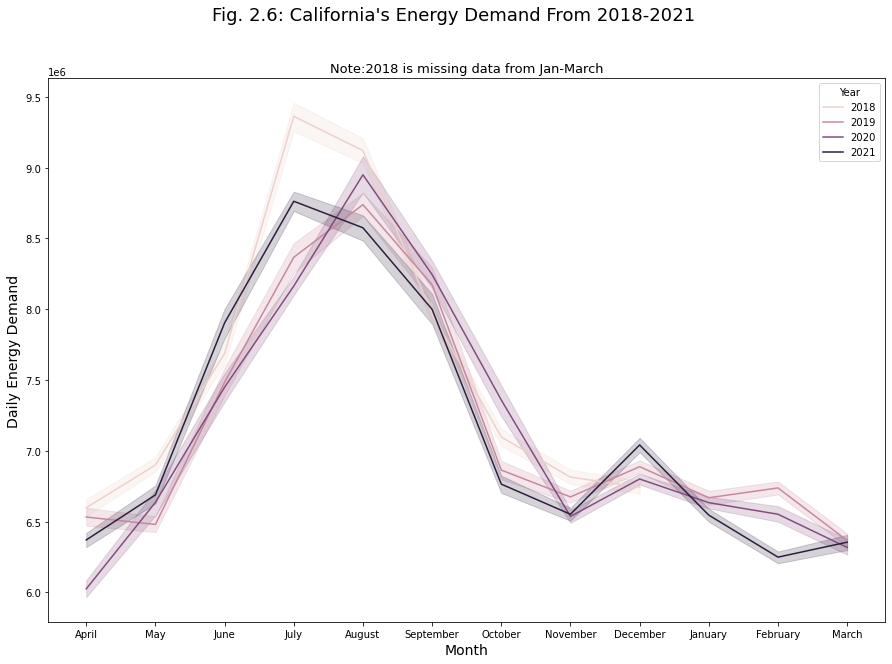

In [41]:
plt.figure(figsize=(15,10))
plt.suptitle("Fig. 2.6: California's Energy Demand From 2018-2021", fontsize = 18)
plt.title("Note:2018 is missing data from Jan-March", fontsize = 13)
lineplotdata=df[(df['Year'] != 2022)]
sns.lineplot(data=lineplotdata, x='Month', y='Daily Energy Demand', hue='Year')

Figure 2.6 shows the year-to-year fluctuation in monthly energy demand.

Since it is hard to see the individual monthly fluctuations when plotted this way, let's examine a boxplot of just April.

<AxesSubplot:title={'center':'Fig. 2.7: CA Energy Demand in April'}, xlabel='Year', ylabel='Daily Energy Demand'>

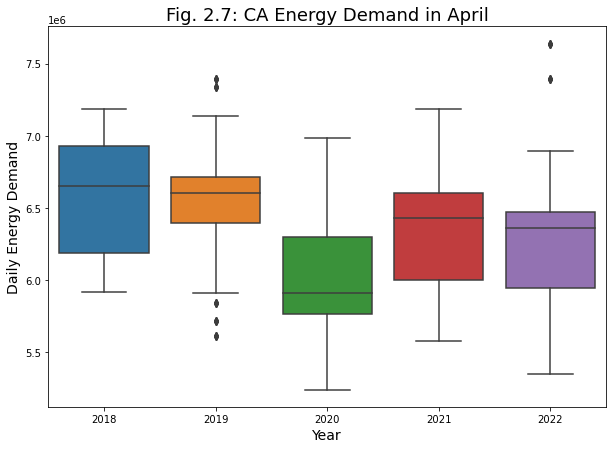

In [42]:
plt.figure(figsize=(10,7))
plt.title("Fig. 2.7: CA Energy Demand in April", fontsize = 18)
april_e = df[(df['Month']== 'April')]   
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.boxplot(data = april_e, x= 'Year', y='Daily Energy Demand')

Figure 2.7 highlights the fluctuation between years, especially given the inverse trend observed between this plot and Figure 2.5 which showed 2020 and 2021 as about equal and 2019 as having less energy demand.

Clearly, weather is going to be an important consideration for forcasting energy demand.

## 2.3 Weather Data Cleaning

By design, the weather data are mostly complete because stations were selected with >99% data coverage for the date range of interest. However, the station locations are inconsistently formatted and Notebook 1 established that there are a handful of dates with missing data.

In [43]:
df.head()

,Date,Daily Energy Demand,Max Temp,Station ID,Station Location,Min Temp,Day,Month,Year
0,2018-04-10,7183786.0,79.0,GHCND:USW00023174,Los Angeles International Airport,60.0,Tuesday,April,2018
1,2018-04-10,7183786.0,85.0,GHCND:USW00023188,San Diego Airport,60.0,Tuesday,April,2018
2,2018-04-10,7183786.0,63.0,GHCND:USW00023272,San Francisco Downtown,52.0,Tuesday,April,2018
3,2018-04-10,7183786.0,86.0,GHCND:USW00093193,FRESNO YOSEMITE INTERNATIONAL,59.0,Tuesday,April,2018
4,2018-04-10,7183786.0,68.0,GHCND:USW00093225,SACRAMENTO METROPOLITAN AIRPORT,51.0,Tuesday,April,2018


First, let's tidy up the dataframe by giving cleaner names and consistent formatting to the station locations

In [44]:
cleaned_cities = {'Los Angeles International Airport': 'Los Angeles Coastal', 'San Diego Airport': 'San Diego', 'San Francisco Downtown': 'San Francisco', 'FRESNO YOSEMITE INTERNATIONAL': 'Fresno', 
                 'San Jose': 'San Jose', 'Ontario Airport': 'Los Angeles Inland', 'SACRAMENTO METROPOLITAN AIRPORT': 'Sacramento'}

In [45]:
df['Station Location']= df['Station Location'].map(cleaned_cities)

In [46]:
df.head()

,Date,Daily Energy Demand,Max Temp,Station ID,Station Location,Min Temp,Day,Month,Year
0,2018-04-10,7183786.0,79.0,GHCND:USW00023174,Los Angeles Coastal,60.0,Tuesday,April,2018
1,2018-04-10,7183786.0,85.0,GHCND:USW00023188,San Diego,60.0,Tuesday,April,2018
2,2018-04-10,7183786.0,63.0,GHCND:USW00023272,San Francisco,52.0,Tuesday,April,2018
3,2018-04-10,7183786.0,86.0,GHCND:USW00093193,Fresno,59.0,Tuesday,April,2018
4,2018-04-10,7183786.0,68.0,GHCND:USW00093225,Sacramento,51.0,Tuesday,April,2018


In Notebook 1 we found that there were a few instances where temperature data was missing for a station. These aren't null values though, they are just dates where a station did not record its temperature values, so there is not a row of data for that day/station combination. This can be verified by:

In [388]:
df.isna().sum()

Date                   0
Daily Energy Demand    0
Max Temp               0
Station ID             0
Station Location       0
Min Temp               0
Day                    0
Month                  0
Year                   0
dtype: int64

The dates without temperature measurements from all 7 stations are: 

*2019-11-18, 2018-02-28, 2022-05-15, 2021-04-23, 2018-08-03, 2018-08-04, 2018-08-05, 2018-08-06, 2018-08-07, 2018-08-08, 2018-12-26, 2019-11-05, 2022-05-16* (see Notebook 1, section 1.3 determination of these dates) 

Let's visualize the missing temperature data with a heatmap, to do this a seperate dataframe will be created.

In [408]:
# Generate a list of the station names to copy and assign to a variable
df['Station Location'].unique() 

array(['Los Angeles Coastal', 'San Diego', 'San Francisco', 'Fresno',
       'Sacramento', 'San Jose', 'Los Angeles Inland'], dtype=object)

In [391]:
# Create a list of dates where at least one value is missing
missing_dates = ['2019-11-18', '2018-02-28', '2022-05-15', '2021-04-23', '2018-08-03', '2018-08-04', '2018-08-05', '2018-08-06', '2018-08-07', '2018-08-08', '2018-12-26', '2019-11-05', '2022-05-16']

# Create a list of all station location names
place_list = ['Los Angeles Coastal', 'San Diego', 'San Francisco', 'Fresno', 'Sacramento', 'Los Angeles Inland', 'San Jose'] 

In [409]:
# Create a small dataframe for visualization 
missingtemps_small= pd.DataFrame(columns=place_list, index=missing_dates )

In [412]:
missingtemps_small

,Los Angeles Coastal,San Diego,San Francisco,Fresno,Sacramento,Los Angeles Inland,San Jose
2019-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [411]:
df['Date'].head(1)

0   2018-04-10
Name: Date, dtype: datetime64[ns]

The index in `missingtemps_small` needs to be used to be able to be compared to the date feature in the main dataframe, however, since `df['Date']` produces a datetime object, that will complicate things. Let's temporarily create a string column of the date in `df`. 

In [398]:
def date_as_str(date):
    date_str = str(date)[0:10] #grab first 10 items in datetime object
    return date_str

In [401]:
df['Date_str'] = df['Date'].apply(date_as_str)

In [402]:
df.head()

,Date,Daily Energy Demand,Max Temp,Station ID,Station Location,Min Temp,Day,Month,Year,Date_str
0,2018-04-10,7183786.0,79.0,GHCND:USW00023174,Los Angeles Coastal,60.0,Tuesday,April,2018,2018-04-10
1,2018-04-10,7183786.0,85.0,GHCND:USW00023188,San Diego,60.0,Tuesday,April,2018,2018-04-10
2,2018-04-10,7183786.0,63.0,GHCND:USW00023272,San Francisco,52.0,Tuesday,April,2018,2018-04-10
3,2018-04-10,7183786.0,86.0,GHCND:USW00093193,Fresno,59.0,Tuesday,April,2018,2018-04-10
4,2018-04-10,7183786.0,68.0,GHCND:USW00093225,Sacramento,51.0,Tuesday,April,2018,2018-04-10


In [403]:
#Defining function to fill in the new dataframe with 0s and 1s depending on if that date&location has a temperature reading
def heatmap_fill(place, index):
    if df[(df['Station Location']== str(place)) & (df['Date_str']== str(index))].empty == True:  #see if there is anything in this dataframe (i.e., if there is a temp reading at this date from this location)
        place = 0                   
        return place
    
    else:
        place= 1
        return place

In [404]:
#perform the function for every location in the list of places
for place in place_list:
    values= missingtemps_small.apply(lambda x: heatmap_fill(place, x.name), axis=1) #Use heatmap_fill on each place and save each Series as 'values'
    missingtemps_small[place] = missingtemps_small[place].fillna(values) #Fill in the null dataframe with 0s and 1s

In [405]:
missingtemps_small

,Los Angeles Coastal,San Diego,San Francisco,Fresno,Sacramento,Los Angeles Inland,San Jose
2019-11-18,1,1,1,1,0,1,1
2018-02-28,0,0,0,0,0,0,0
2022-05-15,1,1,1,1,1,1,0
2021-04-23,1,1,1,1,0,1,1
2018-08-03,1,1,1,1,1,1,0
2018-08-04,1,1,1,1,1,1,0
2018-08-05,1,1,1,1,1,1,0
2018-08-06,1,1,1,1,1,1,0
2018-08-07,1,1,1,1,1,1,0
2018-08-08,1,1,1,1,1,1,0


<AxesSubplot:>

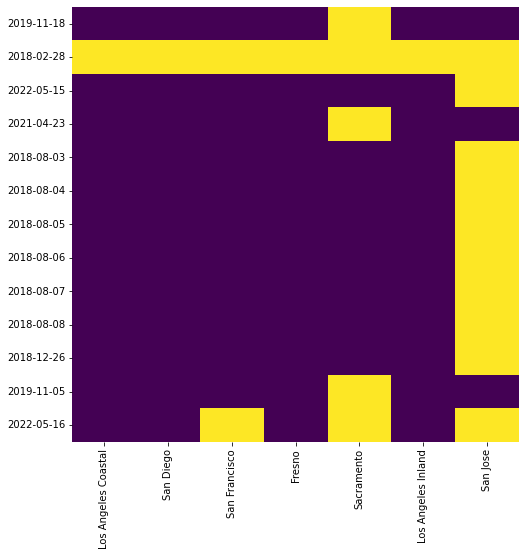

In [406]:
plt.figure(figsize=(8,8))
sns.heatmap(missingtemps_small,cbar=False, cmap='viridis_r')

The yellow indicates missing data. All the cities are missing temperature data for February 28, 2018, and then a few cities are missing temperature data for various other dates. San Jose is missing the most data. 


In [385]:
len(missingtemps_small)

13

In [386]:
len(df)

10472

In [387]:
(13/10472)*100

0.1241405653170359

Since the missing dates only represent 0.1% of the date range in the data frame, nothing further will be done about them. If a significant number of days were missing temperature data we could scrape data from nearby weather stations for imputation, or use various mathematical methods to determine values for imputation.

In [413]:
# Delete df['Date_str'] 
df=df.drop('Date_str', axis=1)

In [416]:
df.head()

,Date,Daily Energy Demand,Max Temp,Station ID,Station Location,Min Temp,Day,Month,Year
0,2018-04-10,7183786.0,79.0,GHCND:USW00023174,Los Angeles Coastal,60.0,Tuesday,April,2018
1,2018-04-10,7183786.0,85.0,GHCND:USW00023188,San Diego,60.0,Tuesday,April,2018
2,2018-04-10,7183786.0,63.0,GHCND:USW00023272,San Francisco,52.0,Tuesday,April,2018
3,2018-04-10,7183786.0,86.0,GHCND:USW00093193,Fresno,59.0,Tuesday,April,2018
4,2018-04-10,7183786.0,68.0,GHCND:USW00093225,Sacramento,51.0,Tuesday,April,2018


Save the cleaned dataframe for modeling in Notebook 3.

In [417]:
df.to_csv('csv_files\df_v2.csv')